<a href="https://colab.research.google.com/github/teddcp/MAchine-Learning-on-KAGGLE/blob/master/MELBOURNE_HOUSE_PRICES_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [165]:
data=pd.read_csv('/content/MELBOURNE_HOUSE_PRICES_LESS.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [167]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


## Counting numerical and categorical columns

In [168]:
# counting the number of Categorical and numerical columns

num= data.select_dtypes(include='object').columns.size

print(f'Number of categorical columns : {c}')
print(f'Number of Numerical columns : { data.columns.size -c}')

Number of categorical columns : 8
Number of Numerical columns : 5


#  Data Preparation : Data Cleaning

## Duplicate values: 
-----------------------------------------------------------------------


 Identify if the datasets have duplicate values or not and remove the duplicate values. 
	

    Find out the number of rows present in the dataset
    Before removing duplicate values
    After removing duplicate values


In [0]:
dups = data.duplicated(keep='first')
data_duplicates= data[dups]

In [170]:
data_duplicates   # 2 rows are duplicates....

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8042,Fitzroy North,5/16 Taplin St,2,h,1010000.0,SP,Woodards,5/05/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council
33942,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,3131,Eastern Metropolitan,4973,15.4,Manningham City Council


In [171]:
# Dropping the duplicates
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)
data.duplicated(keep='first').sum()

# we have removed the 2 duplicate rows and now no duplicate rows are absent

0

##  2. Variable type: 

Check if all the variables have the correct variable type, based on the data dictionary. If not, then change them.

		For how many attributes did you need to change the data type?


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63021 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63021 non-null  object 
 1   Address        63021 non-null  object 
 2   Rooms          63021 non-null  int64  
 3   Type           63021 non-null  object 
 4   Price          48432 non-null  float64
 5   Method         63021 non-null  object 
 6   SellerG        63021 non-null  object 
 7   Date           63021 non-null  object 
 8   Postcode       63021 non-null  int64  
 9   Regionname     63021 non-null  object 
 10  Propertycount  63021 non-null  int64  
 11  Distance       63021 non-null  float64
 12  CouncilArea    63021 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


### **Note**
------------------------------------------------

1. Upon inspection, we can see that `the Date column` has incorrect datatype. We can convert it to date type(date64).

In [0]:
data.Date= pd.to_datetime(data.Date)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63021 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63021 non-null  object        
 1   Address        63021 non-null  object        
 2   Rooms          63021 non-null  int64         
 3   Type           63021 non-null  object        
 4   Price          48432 non-null  float64       
 5   Method         63021 non-null  object        
 6   SellerG        63021 non-null  object        
 7   Date           63021 non-null  datetime64[ns]
 8   Postcode       63021 non-null  int64         
 9   Regionname     63021 non-null  object        
 10  Propertycount  63021 non-null  int64         
 11  Distance       63021 non-null  float64       
 12  CouncilArea    63021 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 6.3+ MB


In [180]:
#getting the unique values and selecting the columns to convert them to categorical
obj_columns = data.select_dtypes(include='object').columns
#print(obj_columns)

unique_counts = pd.DataFrame([(col, data[col].nunique()) for col in obj_columns] ,
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,Type,3
5,Regionname,8
3,Method,9
6,CouncilArea,34
0,Suburb,380
4,SellerG,476
1,Address,57754


### **Note**

1. Based on above dataframe, i will select a thresold value to conver the object the columns to categorical.

2. sp here  `Type, Method, Regionname, CouncilArea` to `category` datatype. 

In [0]:
data[['Type','Method','Regionname','CouncilArea']]= data[['Type','Method','Regionname','CouncilArea']].astype('category')

## Filling the Missing Value

In [182]:
data.isnull().sum()   # only Price has missing data

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14589
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

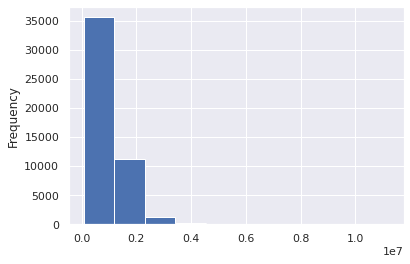

In [183]:
data.Price.plot(kind='hist')   # Since it is right skewed, we will fill it with median  instead of mean.

In [184]:
# filling the Prices's missing values
data.Price.fillna(value=data.Price.median(),axis=0,inplace=True)
data.isna().any().sum()

# No missing values are now

0

## [Outlier](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers) Treatment

In [185]:
#selecting the numerical columns
numeric_cols=data.select_dtypes(include='number').columns
numeric_cols

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'], dtype='object')

In [186]:
# getting the Percentile distribution of each numerical columns
print(f'  order -> min, 10th percentile, 50th percentile, 90th percentile, max , SKEWNESS \n\n')
for col in numeric_cols :
  print(f' {col} : {data[col].min()}, {data[col].quantile(0.1)}, {data[col].quantile(0.5)} ,  {data[col].quantile(0.9)} ,{data[col].max()} ,{data[col].skew()}')
  print()

  order -> min, 10th percentile, 50th percentile, 90th percentile, max , SKEWNESS 


 Rooms : 1, 2.0, 3.0 ,  4.0 ,31 ,0.7926788557578336

 Price : 85000.0, 514500.0, 830000.0 ,  1550000.0 ,11200000.0 ,3.155781466445832

 Postcode : 3000, 3029.0, 3107.0 ,  3194.0 ,3980 ,3.8152950934208536

 Propertycount : 39, 2698.0, 6795.0 ,  14577.0 ,21650 ,0.901582670287076

 Distance : 0.0, 4.3, 11.4 ,  21.5 ,64.1 ,1.1522146391523362



In [187]:
# capping and flooring 
for col in numeric_cols :
  lower= data[col].quantile(0.1)
  upper= data[col].quantile(0.9)
  data[col] = np.where( data[col]< lower, lower, data[col])
  data[col] = np.where(data[col] > upper, upper, data[col])
  print(data[col].skew())

# as you can see , skewness is reduced....
# outliers are removed now

-0.11131401640078263
0.8213523005496368
0.06979666883282498
0.531354642291988
0.2397138808853085


# Feature Enginerring

## Feature Transormation

In [188]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63021.000000,6.302100e+04,63021.000000,63021.000000,63021.000000
mean,3.069120,9.063357e+05,3109.158058,7480.171609,12.111734
std,0.742795,3.161851e+05,58.134358,3805.150757,5.716638
min,2.000000,5.145000e+05,3029.000000,2698.000000,4.300000
25%,3.000000,6.770000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.065000e+06,3163.000000,10412.000000,16.700000
max,4.000000,1.550000e+06,3194.000000,14577.000000,21.500000


**Note**
-------------------------------------------------------

As we can see the `Properycount and Price column `has larger variance, we need to `transform them to make it linear`. 

In [189]:
data['Propertycount']=np.log(data['Propertycount'])
data['Price'] = np.log(data['Price'])

data.describe()

# the variation now got reduced for Propertycount and Price

,Rooms,Price,Postcode,Propertycount,Distance
count,63021.000000,63021.000000,63021.000000,63021.000000,63021.000000
mean,3.069120,13.660314,3109.158058,8.782012,12.111734
std,0.742795,0.333268,58.134358,0.538676,5.716638
min,2.000000,13.150951,3029.000000,7.900266,4.300000
25%,3.000000,13.425427,3056.000000,8.384804,7.000000
50%,3.000000,13.629181,3107.000000,8.823942,11.400000
75%,4.000000,13.878485,3163.000000,9.250714,16.700000
max,4.000000,14.253765,3194.000000,9.587200,21.500000


## Standardization
--------------------------------------------------

We can standardize the `Distance and Postcode` to make them similar with other columns, but we will `pass all the numeric columns` to make the variation as 1.

In [190]:
from sklearn.preprocessing import StandardScaler as ss

scale=ss()

scaled_data= pd.DataFrame(scale.fit_transform(data[numeric_cols]) , columns=numeric_cols)
scaled_data.head()

,Rooms,Price,Postcode,Propertycount,Distance
0,-0.093054,1.662259,-0.725189,-0.897066,-1.366502
1,-0.093054,1.062360,-0.725189,-0.897066,-1.366502
2,-0.093054,1.517872,-0.725189,-0.897066,-1.366502
3,-0.093054,1.712187,-1.189634,-1.636891,-0.806728
4,-1.439332,-0.735992,-1.155231,-1.172947,-0.299433


In [191]:
scaled_data.describe() # all are now in same variation

,Rooms,Price,Postcode,Propertycount,Distance
count,6.302100e+04,6.302100e+04,6.302100e+04,6.302100e+04,6.302100e+04
mean,2.192812e-15,-1.692191e-15,-2.016138e-15,1.118309e-17,-5.016307e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.439332e+00,-1.528401e+00,-1.378852e+00,-1.636891e+00,-1.366502e+00
25%,-9.305446e-02,-7.048054e-01,-9.144073e-01,-7.373848e-01,-8.941925e-01
50%,-9.305446e-02,-9.341716e-02,-3.712220e-02,7.784014e-02,-1.245032e-01
75%,1.253223e+00,6.546489e-01,9.261712e-01,8.701079e-01,8.026225e-01
max,1.253223e+00,1.780719e+00,1.459423e+00,1.494767e+00,1.642284e+00


## Dummy encoding 

In [196]:
pd.get_dummies(data,columns=['Type','Method','Regionname','CouncilArea'],
               prefix=['Type','Method','Regionname','CouncilArea'],
               drop_first=True
               )

,Suburb,Address,Rooms,Price,SellerG,Date,Postcode,Propertycount,Distance,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,Abbotsford,49 Lithgow St,3.0,14.214287,Jellis,2017-01-04,3067.0,8.298788,4.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Abbotsford,59A Turner St,3.0,14.014361,Marshall,2017-01-04,3067.0,8.298788,4.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,119B Yarra St,3.0,14.166167,Nelson,2017-01-04,3067.0,8.298788,4.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Aberfeldie,68 Vida St,3.0,14.230926,Barry,2017-01-04,3040.0,7.900266,7.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2.0,13.415033,Nelson,2017-01-04,3042.0,8.150179,10.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Roxburgh Park,3 Carr Pl,3.0,13.246349,Raine,2018-03-31,3064.0,8.671287,20.6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63017,Roxburgh Park,9 Parker Ct,3.0,13.150951,Raine,2018-03-31,3064.0,8.671287,20.6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63018,Roxburgh Park,5 Parkinson Wy,3.0,13.208541,Raine,2018-03-31,3064.0,8.671287,20.6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63019,Thomastown,3/1 Travers St,3.0,13.629181,Barry,2018-03-31,3074.0,8.981556,15.3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
